## Correlacion de atributos

### Correlacion de atributos "raw"

In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: (column not in ["id"] and ('raw' in column or 'Clas' in column)))
y = df["Class"]

# Crear objeto LabelEncoder
encoder = LabelEncoder()

# Transformar etiquetas de clase
y = encoder.fit_transform(y)

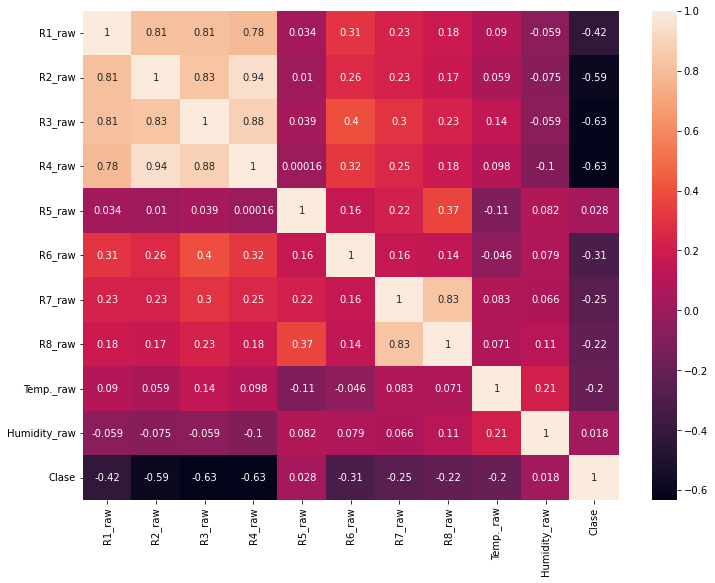

In [7]:
df['Clase'] = pd.DataFrame(y)
corr = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)
plt.show()

In [11]:
newcorr = corr.applymap(lambda x: abs(x))

In [37]:
for c in newcorr.columns:
    t = [(a, b) for a, b in sorted(zip(newcorr[c].values, newcorr.columns), key=lambda x: x[0], reverse=True)]
    t = [e for e in t if e[0] > 0.5 and e[1] != c] if c != 'Clase' else t
    if len(t):
        print(c, t)

R1_raw [(0.8089735507785778, 'R2_raw'), (0.8088278494103679, 'R3_raw'), (0.7839594092463275, 'R4_raw')]
R2_raw [(0.9437288472853228, 'R4_raw'), (0.8295155778368503, 'R3_raw'), (0.8089735507785778, 'R1_raw'), (0.5920279505946916, 'Clase')]
R3_raw [(0.8848672436793715, 'R4_raw'), (0.8295155778368503, 'R2_raw'), (0.8088278494103679, 'R1_raw'), (0.6334827954272766, 'Clase')]
R4_raw [(0.9437288472853228, 'R2_raw'), (0.8848672436793715, 'R3_raw'), (0.7839594092463275, 'R1_raw'), (0.6255821756885649, 'Clase')]
R7_raw [(0.8298220945881832, 'R8_raw')]
R8_raw [(0.8298220945881832, 'R7_raw')]
Clase [(1.0, 'Clase'), (0.6334827954272766, 'R3_raw'), (0.6255821756885649, 'R4_raw'), (0.5920279505946916, 'R2_raw'), (0.4177316130847037, 'R1_raw'), (0.3138492163129158, 'R6_raw'), (0.24901057603352056, 'R7_raw'), (0.21973876223401081, 'R8_raw'), (0.196161645289351, 'Temp._raw'), (0.028330693216018943, 'R5_raw'), (0.018272515505962848, 'Humidity_raw')]


In [36]:
c = 'Clase'
t = sorted(zip(newcorr[c], newcorr.columns), key=lambda x: x[0], reverse=True)
t = [e for e in t if e[0] > 0.2 and e[1] != c]
t

[(0.6334827954272766, 'R3_raw'),
 (0.6255821756885649, 'R4_raw'),
 (0.5920279505946916, 'R2_raw'),
 (0.4177316130847037, 'R1_raw'),
 (0.3138492163129158, 'R6_raw'),
 (0.24901057603352056, 'R7_raw'),
 (0.21973876223401081, 'R8_raw')]

Mejores atributos raw: 3, 6, 7

### Correlacion de atributos modificados

In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: (column not in ["id"] and ('raw' not in column or 'Clas' in column)))
y = df["Class"]

# Crear objeto LabelEncoder
encoder = LabelEncoder()

# Transformar etiquetas de clase
y = encoder.fit_transform(y)

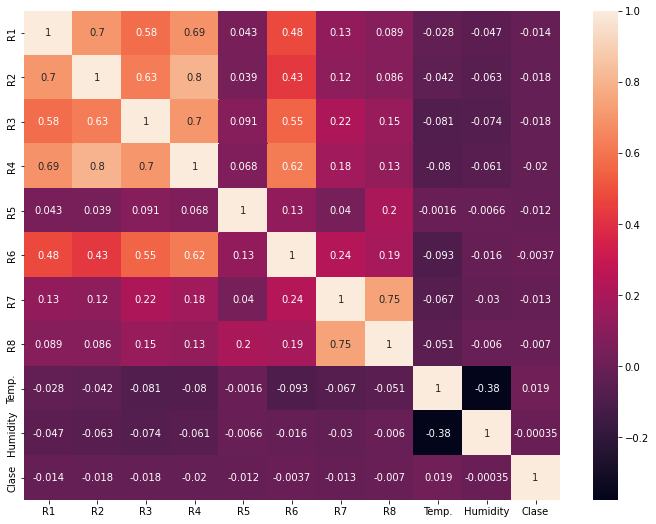

In [39]:
df['Clase'] = pd.DataFrame(y)
corr = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)
plt.show()

In [40]:
newcorr = corr.applymap(lambda x: abs(x))

In [41]:
for c in newcorr.columns:
    t = [(a, b) for a, b in sorted(zip(newcorr[c].values, newcorr.columns), key=lambda x: x[0], reverse=True)]
    t = [e for e in t if e[0] > 0.5 and e[1] != c] if c != 'Clase' else t
    if len(t):
        print(c, t)

R1 [(0.7041030553292472, 'R2'), (0.6932962174886287, 'R4'), (0.578097207124351, 'R3')]
R2 [(0.7994816287663769, 'R4'), (0.7041030553292472, 'R1'), (0.6276414655170295, 'R3')]
R3 [(0.6991406943241907, 'R4'), (0.6276414655170295, 'R2'), (0.578097207124351, 'R1'), (0.5530217266145512, 'R6')]
R4 [(0.7994816287663769, 'R2'), (0.6991406943241907, 'R3'), (0.6932962174886287, 'R1'), (0.6195273897922411, 'R6')]
R6 [(0.6195273897922411, 'R4'), (0.5530217266145512, 'R3')]
R7 [(0.7456391200768475, 'R8')]
R8 [(0.7456391200768475, 'R7')]
Clase [(1.0, 'Clase'), (0.020412213059676398, 'R4'), (0.018505957476009395, 'Temp.'), (0.018484044004824014, 'R2'), (0.018310082317488718, 'R3'), (0.014076383394888224, 'R1'), (0.012722396191067147, 'R7'), (0.01204404662097246, 'R5'), (0.007001929109857539, 'R8'), (0.0036678406726316872, 'R6'), (0.00034772826701578476, 'Humidity')]


In [44]:
c = 'Clase'
t = sorted(zip(newcorr[c], newcorr.columns), key=lambda x: x[0], reverse=True)
t = [e for e in t if e[1] != c]
t

[(0.020412213059676398, 'R4'),
 (0.018505957476009395, 'Temp.'),
 (0.018484044004824014, 'R2'),
 (0.018310082317488718, 'R3'),
 (0.014076383394888224, 'R1'),
 (0.012722396191067147, 'R7'),
 (0.01204404662097246, 'R5'),
 (0.007001929109857539, 'R8'),
 (0.0036678406726316872, 'R6'),
 (0.00034772826701578476, 'Humidity')]

Mejores atributos modificados: 3, 7

## Tests con menos atributos

### Usando solo R3, R7, R3_raw, R5_raw, R6_raw, R7_raw

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

clasificadores = [
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=0),
    DecisionTreeClassifier(random_state=0)
]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(df.columns), df.columns)
for clasif in clasificadores:
    clasif.fit(X_train, y_train)
    y_pred = clasif.predict(X_test)
    print(f"Accuracy {type(clasif).__name__}: ", accuracy_score(y_test, y_pred))

8 Index(['R3', 'R7', 'Temp.', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'], dtype='object')
Accuracy KNeighborsClassifier:  0.9402626859373352
Accuracy GaussianNB:  0.6726447937546155
Accuracy RandomForestClassifier:  0.9996307627386856
Accuracy DecisionTreeClassifier:  0.9967559869184514


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(df.columns), df.columns)
for clasif in clasificadores:
    clasif.fit(X_train, y_train)
    y_pred = clasif.predict(X_test)
    print(f"Accuracy {type(clasif).__name__}: ", accuracy_score(y_test, y_pred))

5 Index(['R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'], dtype='object')
Accuracy KNeighborsClassifier:  0.9969142314590147
Accuracy GaussianNB:  0.6730404051060238
Accuracy RandomForestClassifier:  0.9993406477476527
Accuracy DecisionTreeClassifier:  0.9974417132608925


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(df.columns), df.columns)
for clasif in clasificadores:
    clasif.fit(X_train, y_train)
    y_pred = clasif.predict(X_test)
    print(f"Accuracy {type(clasif).__name__}: ", accuracy_score(y_test, y_pred))

7 Index(['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'], dtype='object')
Accuracy KNeighborsClassifier:  0.9559288954531069
Accuracy GaussianNB:  0.6814273657558815
Accuracy RandomForestClassifier:  0.9994988922882161
Accuracy DecisionTreeClassifier:  0.9970988500896719


### Con todos los atributos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column not in ["id"])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [2]:
print(len(df.columns), df.columns)

21 Index(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity',
       'R1_raw', 'R2_raw', 'R3_raw', 'R4_raw', 'R5_raw', 'R6_raw', 'R7_raw',
       'R8_raw', 'Temp._raw', 'Humidity_raw', 'Class'],
      dtype='object')


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for clasif in clasificadores:
    clasif.fit(X_train, y_train)
    y_pred = clasif.predict(X_test)
    print(f"Accuracy {type(clasif).__name__}: ", accuracy_score(y_test, y_pred))

Accuracy KNeighborsClassifier:  0.9662675387699124
Accuracy GaussianNB:  0.6874670323873826
Accuracy RandomForestClassifier:  0.9999736259099061
Accuracy DecisionTreeClassifier:  0.9989450363962443


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  background       1.00      1.00      1.00     10098
      banana       0.99      0.99      0.99     11736
        wine       0.99      0.99      0.99     16082

    accuracy                           0.99     37916
   macro avg       0.99      0.99      0.99     37916
weighted avg       0.99      0.99      0.99     37916



## Correlaciones de los atributos escogidos

In [27]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])
y = df["Class"]

# Crear objeto LabelEncoder
encoder = LabelEncoder()

# Transformar etiquetas de clase
y = encoder.fit_transform(y)

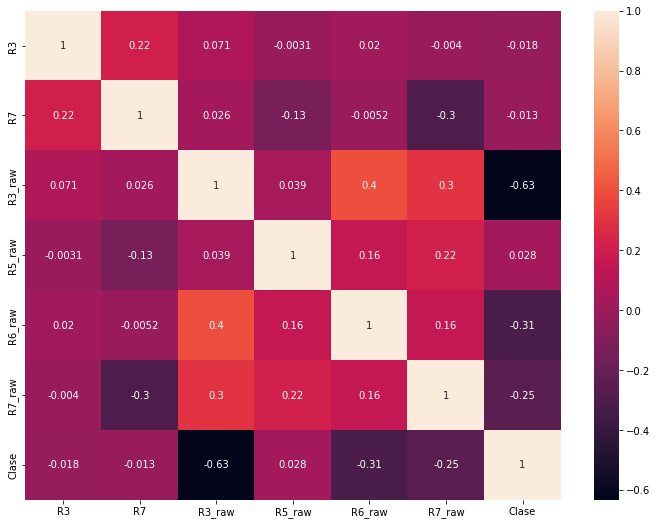

In [28]:
df['Clase'] = pd.DataFrame(y)
corr = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)
plt.show()